# Campo de Vientos

El campo Velocidad puede ser expresado como:

$\overrightarrow{V(x,y)}= u(x,y)\overrightarrow{i} +v(x,y)\overrightarrow{j}$

La ecuacion de líneas de corriente es:

$\displaystyle\ {{dy\over dx} = {v(x,y)\over u(x,y)}}$ 

en función la divergencia ${\nabla_o}$, de la vorticidad ${\zeta_o}$ y los factores de deformación f1 y f2

${u = \phi (\nabla_o,\zeta_o, f1, f2)}$

${v = \psi (\nabla_o,\zeta_o, f1, f2)}$

sería como sigue:

$\displaystyle\ { {u(x,y)= -\zeta_o  * y - \nabla_o * x + f1 * x -  f2 * y} }$
  
$\displaystyle\ { {v(x,y)= \zeta_o * x - \nabla_o * y - f1 * y - f2 * x} }$

reagrupando:

${\displaystyle\ { {u(x,y)= -(f2 + \zeta_o) * y  +  (f1 - \nabla_o) * x} } }$

${\displaystyle\ { { v(x,y)= -(f1 + \nabla_o)* y  -  (f2 - \zeta_o) * x} } }$
 
por tanto:

$\displaystyle\ {dy\over dx}  = \displaystyle\ {{-(f1 + \nabla_o)* y   -   ( f2 - \zeta_o) * x}\over{-(f2 + \zeta_o ) * y  +  (f1 - \nabla_o) * x}}$

multiplicando por $-1\over{-1}$

$\displaystyle\ {dy\over dx}  = \displaystyle\ {{(\nabla_o + f1)* y   +   (f2 -\zeta_o) * x}\over{(\zeta_o + f2) * y  -  (f1 - \nabla_o) * x}}$

finalmente:

$\displaystyle\ {dy\over dx}  = \displaystyle\ {{(\nabla_o + f1)* y   -   (\zeta_o - f2) * x}\over{(\zeta_o + f2) * y  +  (\nabla_o - f1) * x}}$


# Direcciones

In [1]:
%matplotlib inline

In [2]:
#array
import numpy as np
#plot
import matplotlib.pyplot as plt
#3D
from mpl_toolkits.mplot3d.axes3d import Axes3D
#Color
from matplotlib import cm
#widgets
from ipywidgets import interact

In [3]:
def espiral (Vot=.7,Div=.5,f1=.2,f2=.1, Vmax=120, Rmax=40):
    
    # make data    
    x = np.linspace(-100, 100, 11)
    y = np.linspace(100, -100, 11)
    X, Y = np.meshgrid( x, y )
    
    #Y, X= np.mgrid[-5:6,-5:6].astype('float64')
    #Y=-Y    
    
    u =-Vot*Y - Div*X + f1*X - f2*Y
    v =-Div*Y + Vot*X - f1*Y - f2*X
   
    #V = Vmax - (np.sqrt(u**2 + v**2))#/(np.sqrt(X**2 + Y**2) + Rmax)**2 
    V = (np.sqrt(u**2 + v**2))

    # plot
    fig, ax = plt.subplots(1,3,figsize=(24,8))
    
    ax[0].contourf(X, Y, V, cmap=cm.coolwarm)
    ax[0].quiver(X, Y, u, v, color="k", angles='xy', scale_units='xy', scale=3, width=.003)
    ax[0].set_title("$dy/dx = f(x,y)$")
    
    ax[1].contourf(X, Y, V, cmap=cm.coolwarm)
    #ax[1].streamplot(X, Y, u, v, color="k", density=1)
    
    ax=fig.add_subplot(1, 3, 3, projection='3d')
    ax.plot_surface(X, Y, V, cmap=cm.coolwarm)
    ax.set_title("${V(x,y) = \sqrt{u(x,y)^2 +v(x,y)^2}}$")
    ax.view_init(35, 70)

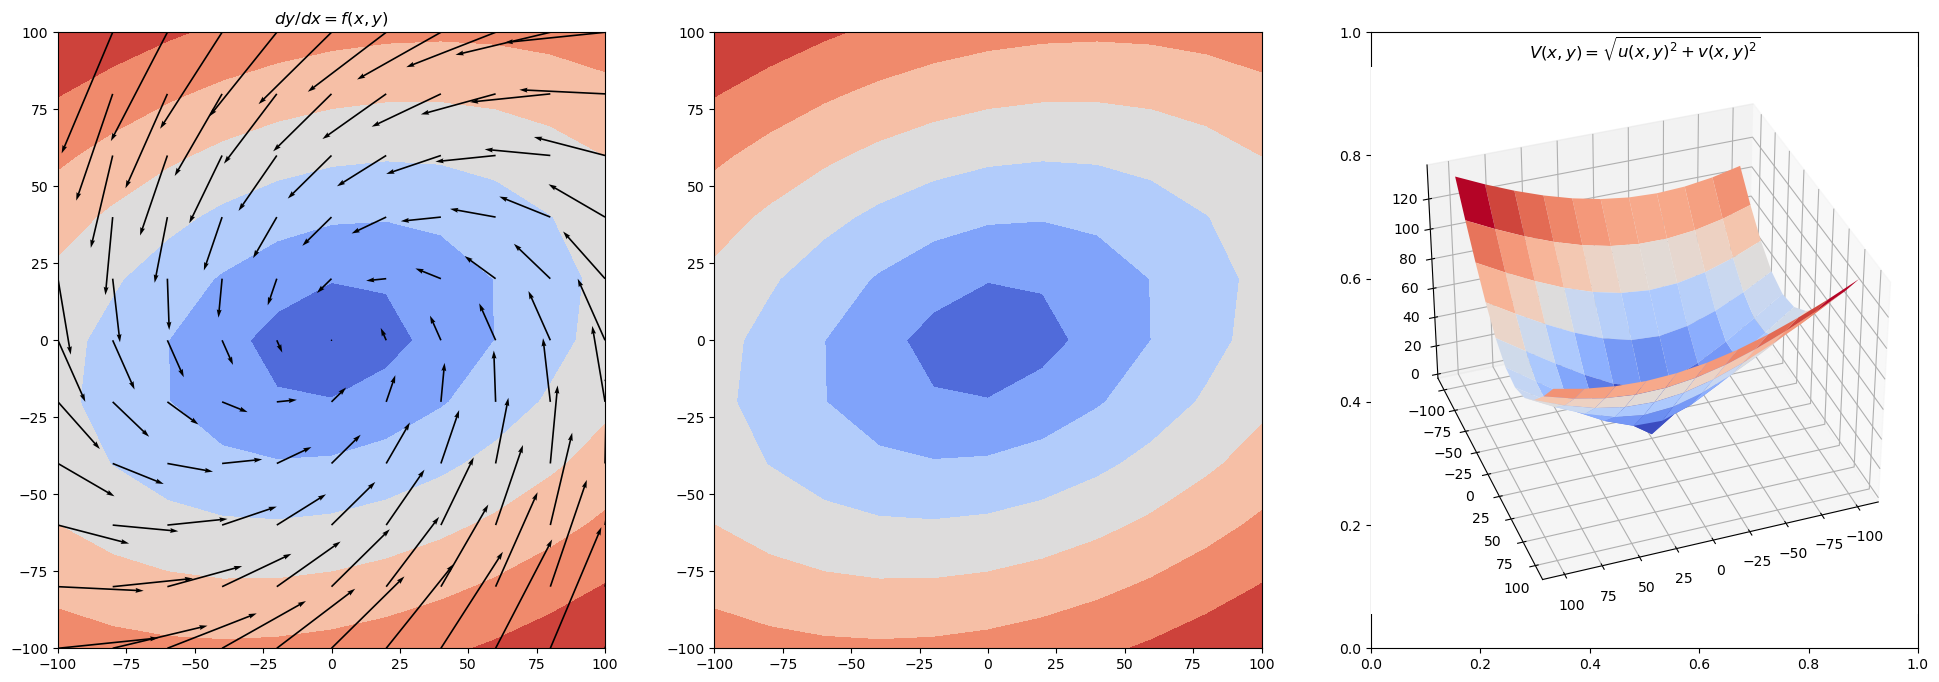

In [4]:
espiral()
#interact(espiral,Vot=(-1.0,1.0),Div=(-1.0,1.0),f1=(-1.0,1.0),f2=(-1.0,1.0),Vmax=(80,250), Rmax=(15,50))

# Intensidad

In [5]:
def Surf (Vot=.7,Div=.5,f1=.2,f2=.1, fi=35, ci=35):
    
    # make data    
    x = np.linspace(-100, 100, 101)
    y = np.linspace(100, -100, 101)
    X, Y = np.meshgrid( x, y )
    
    u =-Vot*Y - Div*X + f1*X - f2*Y
    v =-Div*Y + Vot*X - f1*Y - f2*X
   
    V = (np.sqrt(u**2 + v**2))
    
    fig, ax=plt.subplots(figsize=(80,25))
    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, V, cmap=cm.coolwarm)
    ax.plot_wireframe(X, Y, V,  color='k')
    ax.view_init(fi, ci)  
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    plt.colorbar(ax.contourf(X, Y, V, cmap=cm.coolwarm))
    ax.plot_wireframe(X, Y, V,  color='k')
    ax.view_init(fi, ci)             

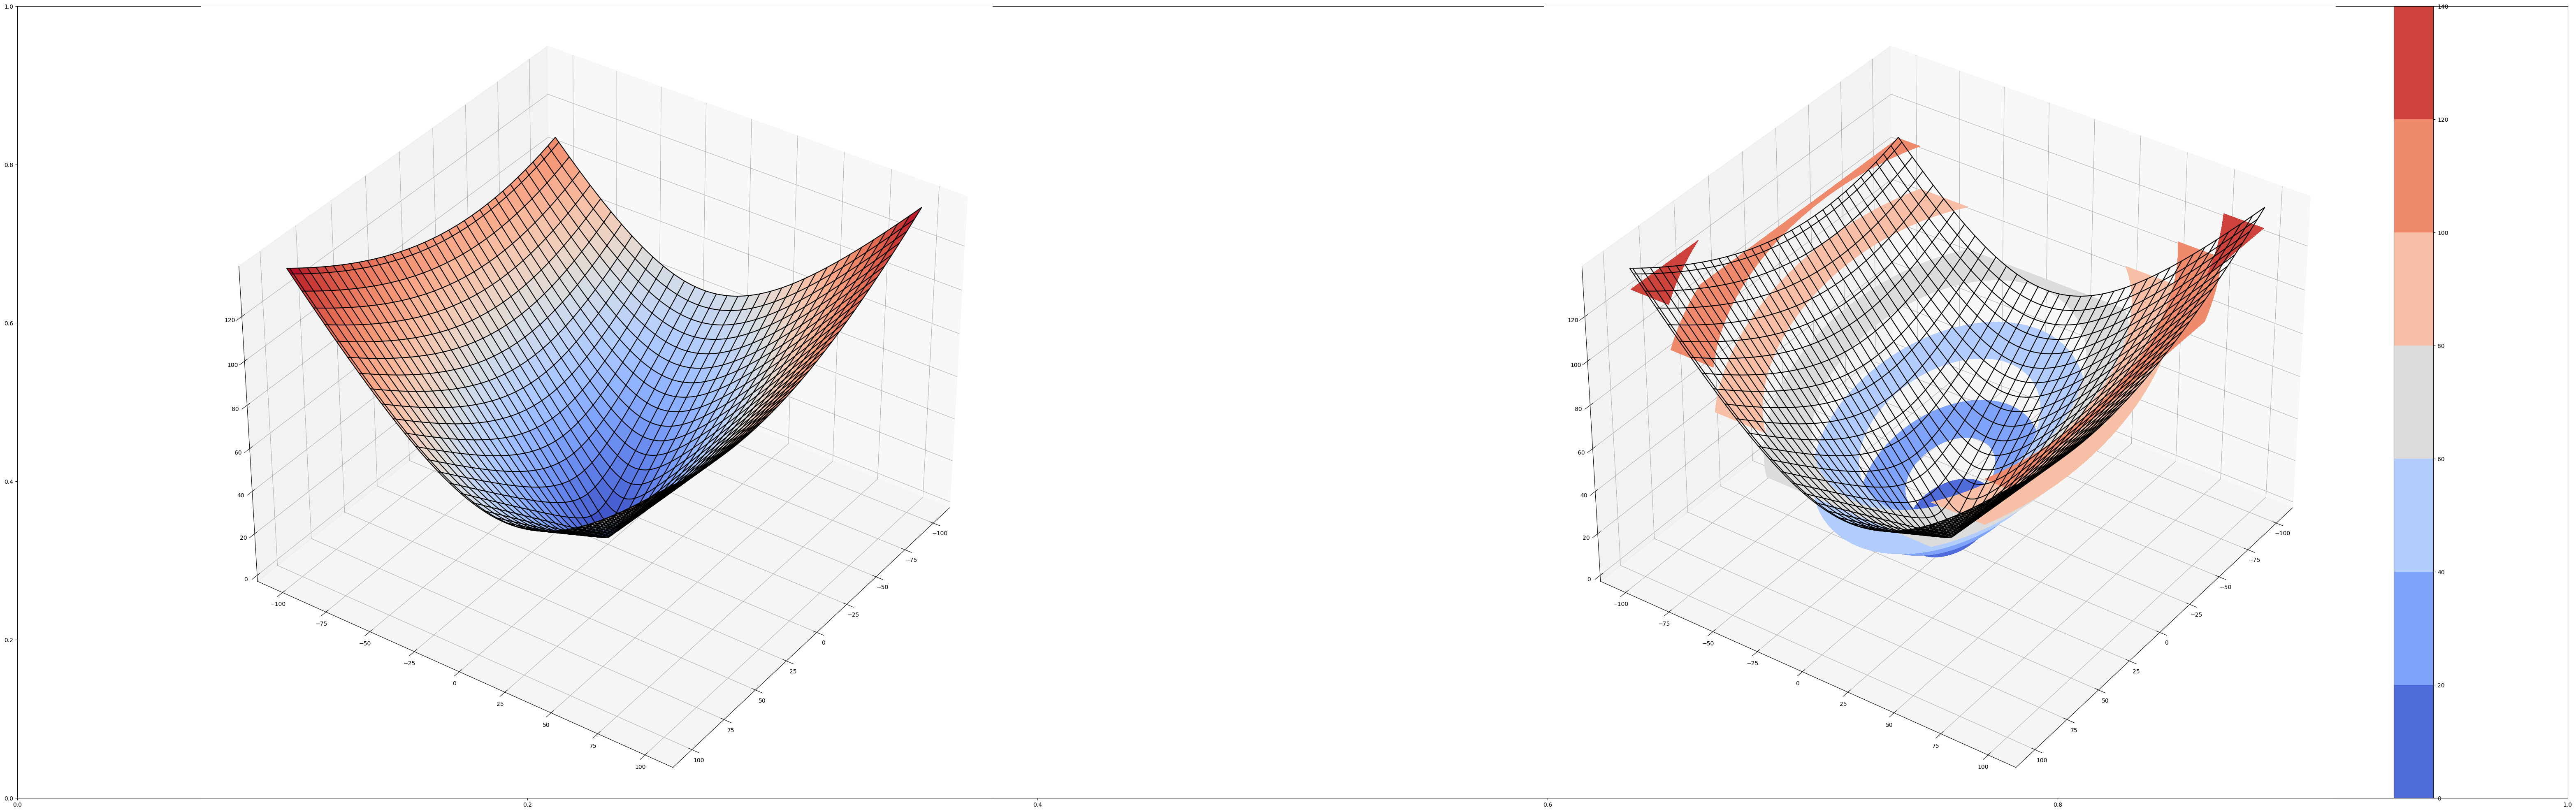

In [6]:
Surf()
#interact(Surf, Vot=(-1.0,1.0), Div=(-1.0,1.0),f1=(-1.0,1.0),f2=(-1.0,1.0), fi=(0, 80), ci=(0, 80))

$$ V = {Vmax\over{(R + R_o)^2}}$$